# Objectif
L'objectif de cette analyse est de déterminer si l'approbation d'un prêt (variable cible) peut être prédite en utilisant les variables disponibles (caractéristiques des demandeurs de prêt). Pour cela, nous avons utilisé l'Analyse Factorielle Discriminante

In [78]:
from sklearn import datasets
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder

In [81]:
import pandas as pd
train_data = pd.read_excel('train (1).xlsx')


In [82]:
X.head

<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
495  LP002978  Female      No          0      Graduate            No   
496  LP002979    Male     Yes         3+      Graduate            No   
497  LP002983    Male     Yes          1      Graduate            No   
498  LP002984    Male     Yes          2      Graduate            No   
499  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583            

In [83]:
#Ajouter...
df = X.join(pd.Series(y, name='Loan_Status'))
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y


In [84]:
#préparation des données
df['Dependents'] = df['Dependents'].replace('3+', '3')
# Convertir la colonne 'Dependents' en numérique
df['Dependents'] = df['Dependents'].astype(int)

In [86]:
# Convertir les colonnes catégorielles en chaînes de caractères
df['Dependents'] = df['Dependents'].astype(str)

# Sélectionner les colonnes pertinentes pour l'encodage
X_categorical = df.select_dtypes(include=['object'])

# Convertir les colonnes catégorielles en numériques avec LabelEncoder
label_encoders = {}
for column in X_categorical.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print(df)

     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        1           1          0              0   
1          1       1        1           0          0              1   
2          2       1        1           0          1              0   
3          3       1        0           0          0              0   
4          4       1        1           2          0              1   
..       ...     ...      ...         ...        ...            ...   
495      495       0        0           0          0              0   
496      496       1        1           3          0              0   
497      497       1        1           1          0              0   
498      498       1        1           2          0              0   
499      499       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0         128               360   
1

In [87]:
#Codage...
le = LabelEncoder()
y = le.fit_transform(df['Loan_Status'])

In [88]:
# Séparer les caractéristiques (X) et la cible (y)
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)  # Exclure 'Loan_ID' et 'Loan_Status' de X
y = df['Loan_Status']


In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [90]:
lda.explained_variance_ratio_

array([1.])

# Interprétation
Un ratio de [1.0] signifie que la première composante de l'analyse discriminante linéaire capture 100% de la variance des données. Cela indique que cette composante est parfaitement capable de distinguer les deux classes présentes dans les données. En d'autres termes, il existe une combinaison linéaire des caractéristiques initiales des demandeurs de prêt qui permet de prendre une décision d'approbation ou de refus du prêt de manière précise et fiable.

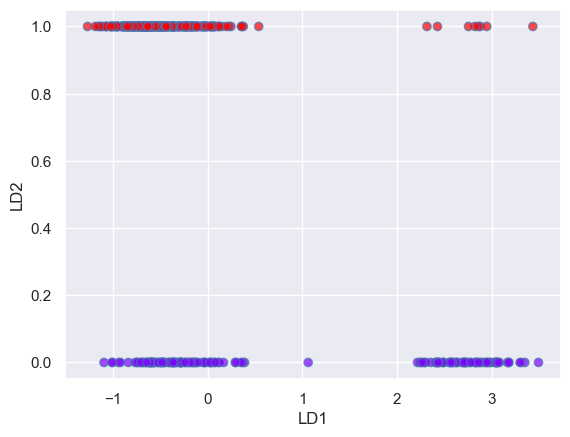

In [91]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    y,
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)


# Interprétation
La répartition distincte des points sur l'axe discriminant principal (LD1), qui capture 100% de la variance entre les classes, suggère que les caractéristiques des demandeurs peuvent être utilisées pour prédire avec précision l'approbation du prêt. Bien que certaines superpositions soient observées le long de LD1, les résultats globaux indiquent que l'algorithme est capable de distinguer les deux classes malgré cela. Ainsi, il semble probable que les variables disponibles puissent être utilisées pour prédire l'approbation du prêt avec une certaine fiabilité.